# Tabular Playground Series - Jan 2021

## Proje [Linki](https://www.kaggle.com/competitions/tabular-playground-series-jan-2021/overview)

In [336]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jan-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-jan-2021/train.csv
/kaggle/input/tabular-playground-series-jan-2021/test.csv


In [337]:
pd.read_csv("/kaggle/input/tabular-playground-series-jan-2021/sample_submission.csv")

,id,target
0,0,0.5
1,2,0.5
2,6,0.5
3,7,0.5
4,10,0.5
...,...,...
199995,499984,0.5
199996,499985,0.5
199997,499987,0.5
199998,499988,0.5


In [338]:
df = pd.read_csv("/kaggle/input/tabular-playground-series-jan-2021/train.csv")
data = pd.read_csv("/kaggle/input/tabular-playground-series-jan-2021/test.csv")
df

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411,7.243043
1,3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484,8.203331
2,4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047,7.776091
3,5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528,6.957716
4,8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772,7.951046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499995,0.216974,0.735265,0.648648,0.255387,0.616353,0.345197,0.295718,0.304357,0.314351,0.860504,0.315397,0.247682,0.486542,0.288750,7.385215
299996,499996,0.545799,0.165139,0.220966,0.190053,0.359362,0.386336,0.365767,0.344217,0.466446,0.454581,0.360251,0.360755,0.292535,0.619984,7.242617
299997,499997,0.284401,0.841542,0.957585,0.340383,0.396279,0.330376,0.525687,0.260039,0.378174,0.526925,0.491735,0.516629,0.173521,0.714552,9.592487
299998,499998,0.481900,0.622346,0.540032,0.823118,0.283066,0.434283,0.174342,0.710843,0.358690,0.648272,0.984647,1.001110,0.063956,0.377693,8.207951


In [339]:
data

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,499984,0.353856,0.677578,0.550852,0.869612,0.957635,0.255054,0.289138,0.635979,0.271399,0.282455,0.217169,0.219088,0.373261,0.272479
199996,499985,0.243209,0.135627,0.218393,0.792798,0.547639,0.433520,0.549540,0.650107,0.453787,0.459689,0.450424,0.511176,0.318334,0.395747
199997,499987,0.506973,0.683893,0.533434,0.192957,0.314381,0.358604,0.554455,0.267105,0.396101,0.445390,0.382656,0.397978,0.381235,0.369464
199998,499988,0.347870,0.553112,0.495284,0.861500,0.816914,0.298478,0.275964,0.265841,0.334250,0.252635,0.213589,0.285223,0.336772,0.388505


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cont1   300000 non-null  float64
 2   cont2   300000 non-null  float64
 3   cont3   300000 non-null  float64
 4   cont4   300000 non-null  float64
 5   cont5   300000 non-null  float64
 6   cont6   300000 non-null  float64
 7   cont7   300000 non-null  float64
 8   cont8   300000 non-null  float64
 9   cont9   300000 non-null  float64
 10  cont10  300000 non-null  float64
 11  cont11  300000 non-null  float64
 12  cont12  300000 non-null  float64
 13  cont13  300000 non-null  float64
 14  cont14  300000 non-null  float64
 15  target  300000 non-null  float64
dtypes: float64(15), int64(1)
memory usage: 36.6 MB


In [341]:
df.isnull().sum()

id        0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
target    0
dtype: int64

In [342]:
aziz = df.corr()["target"].sort_values(ascending = False).index
print(aziz)
df.corr()["target"].sort_values(ascending = False)

Index(['target', 'cont7', 'cont2', 'cont3', 'cont11', 'cont12', 'cont6',
       'cont8', 'cont4', 'id', 'cont5', 'cont14', 'cont13', 'cont9', 'cont10',
       'cont1'],
      dtype='object')


target    1.000000
cont7     0.067234
cont2     0.067102
cont3     0.058936
cont11    0.050996
cont12    0.047809
cont6     0.027955
cont8     0.014698
cont4     0.005522
id        0.001347
cont5    -0.005358
cont14   -0.006609
cont13   -0.006642
cont9    -0.013029
cont10   -0.021143
cont1    -0.032994
Name: target, dtype: float64

In [343]:
azizo = list(aziz[1:9])
azizo.append("id")
azizo.append("target")
azizo

['cont7',
 'cont2',
 'cont3',
 'cont11',
 'cont12',
 'cont6',
 'cont8',
 'cont4',
 'id',
 'target']

In [344]:
aziz = aziz[1:6]
print(aziz)
print(len(aziz))

Index(['cont7', 'cont2', 'cont3', 'cont11', 'cont12'], dtype='object')
5


In [345]:
df[aziz[0]] = df[aziz[0]]*2 + df[aziz[1]]*2

In [346]:
df[aziz[1]] = df[aziz[3]]*2 + df[aziz[1]]*2

In [347]:
df[aziz[2]] = df[aziz[3]]*2 + df[aziz[0]]*6

In [348]:
df[aziz[3]] = df[aziz[4]] + df[aziz[3]]

In [349]:
df[aziz[0]]

0         3.404000
1         2.263856
2         1.467160
3         1.825827
4         1.816697
            ...   
299995    2.061966
299996    1.061812
299997    2.734458
299998    1.593376
299999    1.404961
Name: cont7, Length: 300000, dtype: float64

In [350]:
df.corr()["target"].sort_values(ascending = False)

target    1.000000
cont3     0.089811
cont7     0.089431
cont2     0.078879
cont11    0.051709
cont12    0.047809
cont6     0.027955
cont8     0.014698
cont4     0.005522
id        0.001347
cont5    -0.005358
cont14   -0.006609
cont13   -0.006642
cont9    -0.013029
cont10   -0.021143
cont1    -0.032994
Name: target, dtype: float64

cont1


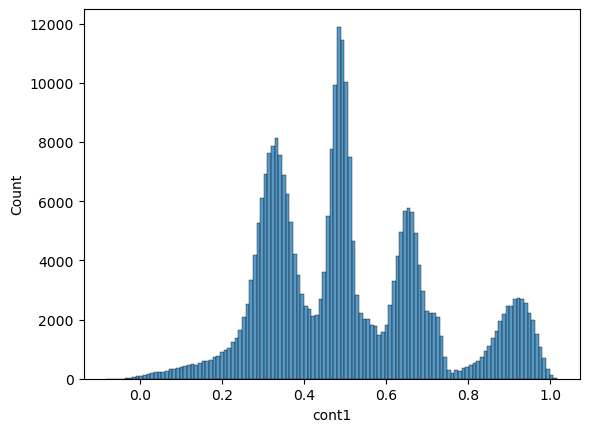

0.360846    2
0.681961    2
0.477030    2
0.498108    2
0.578353    2
           ..
0.936287    1
0.774905    1
0.282492    1
0.829187    1
0.486632    1
Name: cont1, Length: 299865, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
cont2


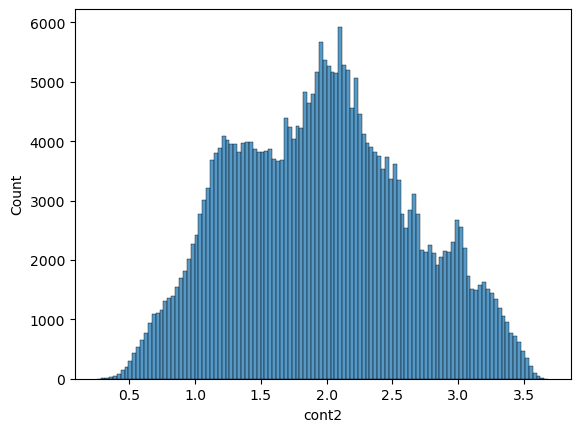

3.466263    1
2.429466    1
1.693955    1
2.269173    1
2.010302    1
           ..
1.079799    1
1.415222    1
2.580411    1
1.404422    1
2.024571    1
Name: cont2, Length: 300000, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
cont3


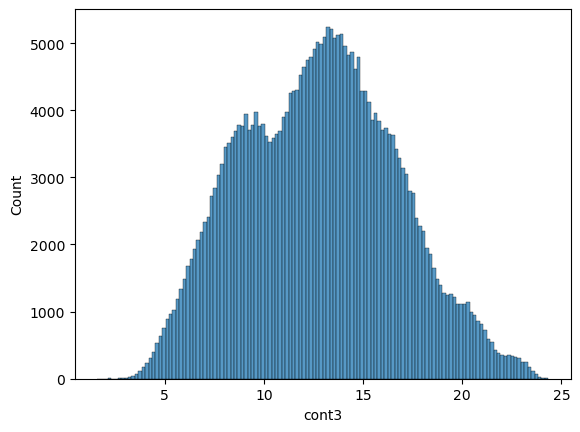

22.267663    1
16.618507    1
8.256476     1
13.410917    1
12.028951    1
            ..
6.717860     1
8.260644     1
16.034938    1
8.140554     1
9.994160     1
Name: cont3, Length: 300000, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
cont4


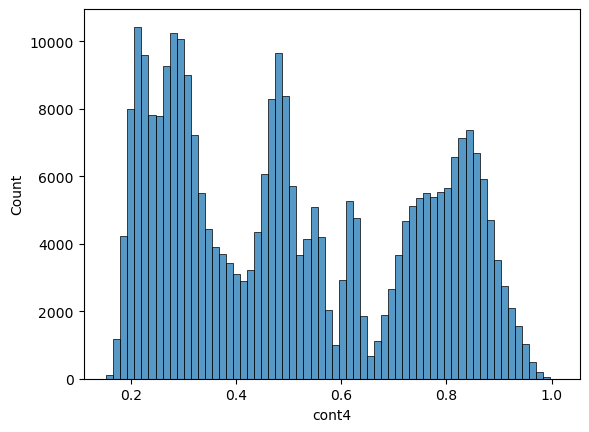

0.201229    2
0.256831    2
0.487485    2
0.569361    2
0.846497    2
           ..
0.282988    1
0.853899    1
0.768331    1
0.482462    1
0.263878    1
Name: cont4, Length: 299892, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
cont5


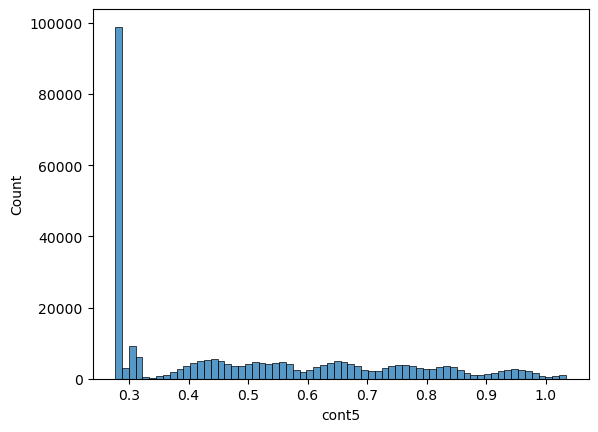

0.283297    3
0.282485    2
0.282309    2
0.768160    2
0.284422    2
           ..
0.279892    1
0.524382    1
0.645854    1
0.313485    1
0.279118    1
Name: cont5, Length: 299730, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
cont6


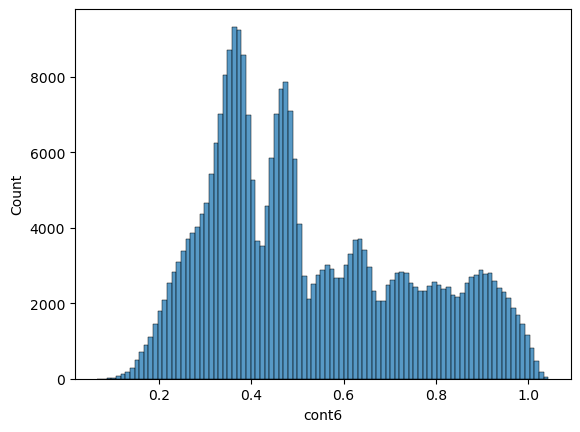

0.343690    2
0.361695    2
0.770407    2
0.314771    2
0.258257    2
           ..
0.948686    1
0.482789    1
0.920555    1
0.669053    1
0.636295    1
Name: cont6, Length: 299830, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
cont7


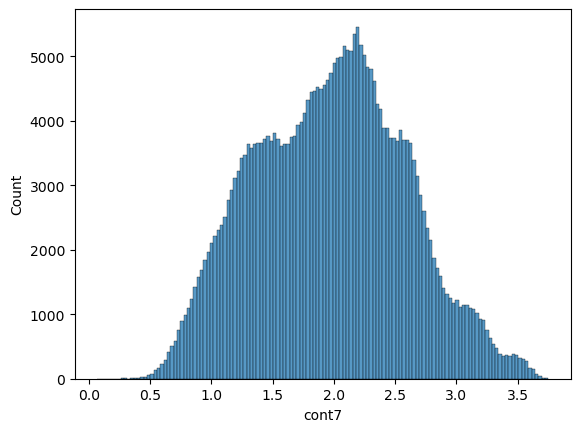

3.404000    1
2.627621    1
1.170066    1
1.941835    1
1.809327    1
           ..
0.969407    1
1.280827    1
2.508669    1
1.241512    1
1.404961    1
Name: cont7, Length: 300000, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
cont8


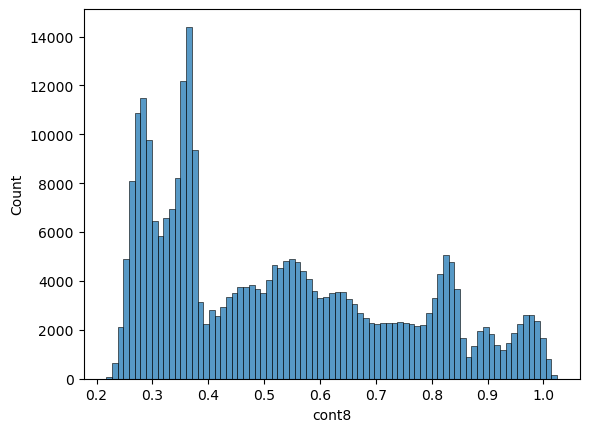

0.361963    2
0.362675    2
0.380566    2
0.351910    2
0.792706    2
           ..
0.646515    1
0.565124    1
0.324169    1
0.818644    1
0.339654    1
Name: cont8, Length: 299853, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
cont9


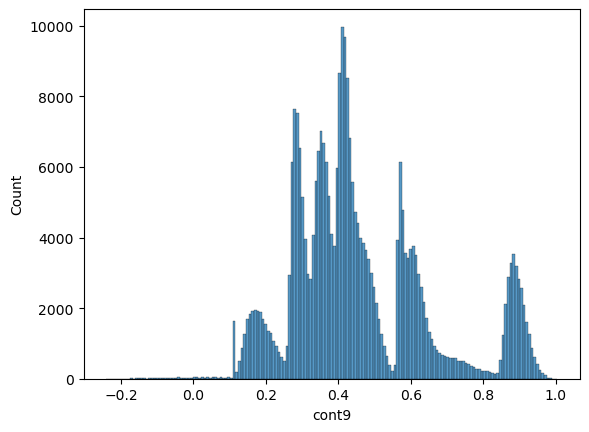

0.345653    2
0.445091    2
0.404488    2
0.333055    2
0.285222    2
           ..
0.855527    1
0.943410    1
0.388701    1
0.336939    1
0.444787    1
Name: cont9, Length: 299651, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
cont10


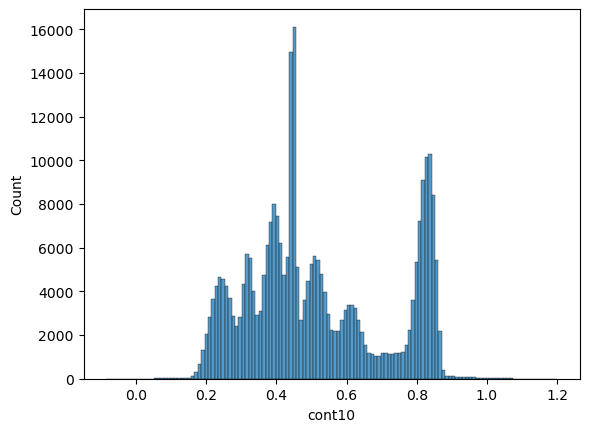

0.473340    2
0.852232    2
0.387747    2
0.790676    2
0.853124    2
           ..
0.822315    1
0.529803    1
0.805870    1
0.449470    1
0.636765    1
Name: cont10, Length: 299851, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
cont11


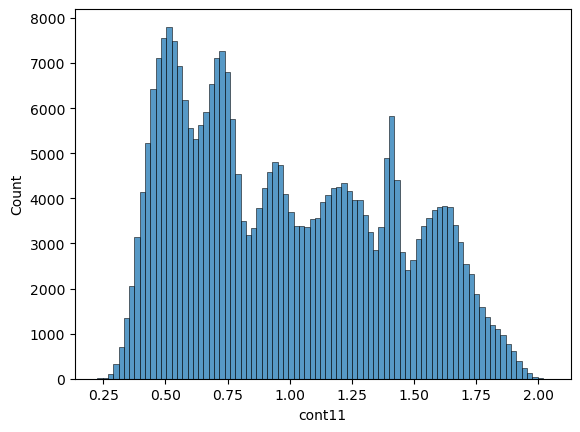

1.788604    1
0.900106    1
1.158471    1
1.689323    1
1.121227    1
           ..
0.925166    1
0.508968    1
0.991913    1
0.701497    1
1.341888    1
Name: cont11, Length: 300000, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
cont12


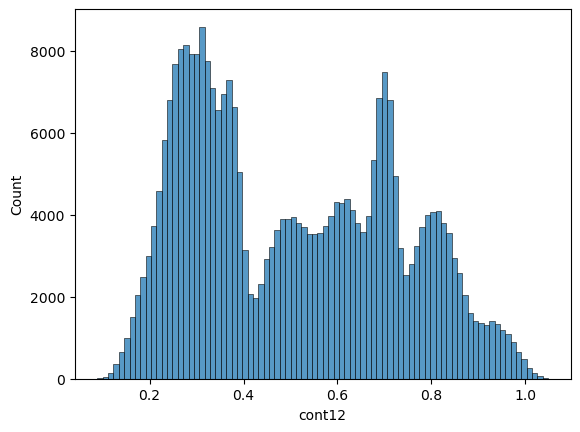

0.784409    2
0.689396    2
0.818844    2
0.881716    2
0.733443    2
           ..
0.469840    1
0.685705    1
0.354576    1
0.718756    1
0.559692    1
Name: cont12, Length: 299886, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
cont13


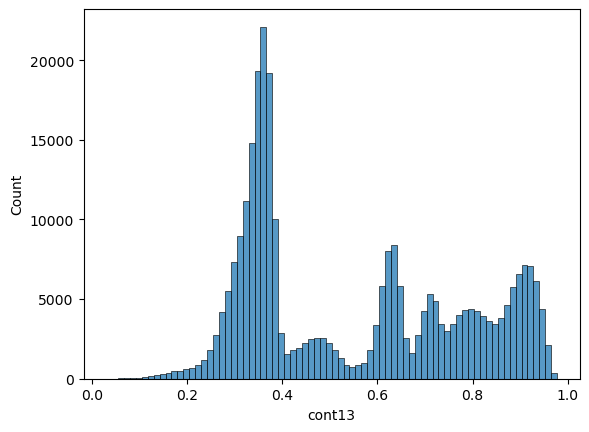

0.373036    3
0.417585    2
0.367890    2
0.342982    2
0.354921    2
           ..
0.821659    1
0.392893    1
0.902937    1
0.748451    1
0.762954    1
Name: cont13, Length: 299728, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
cont14


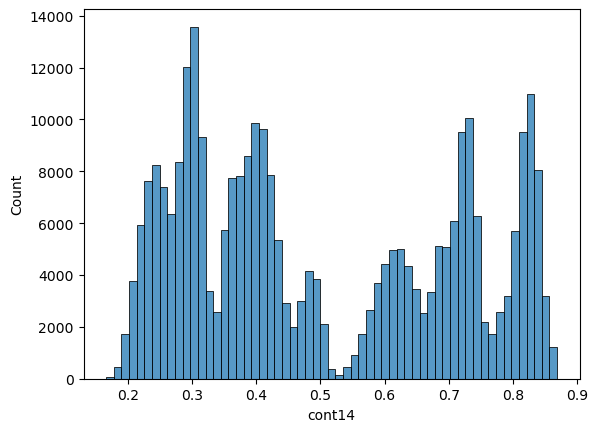

0.637555    2
0.575581    2
0.843097    2
0.405276    2
0.409421    2
           ..
0.362875    1
0.300912    1
0.750893    1
0.244457    1
0.215539    1
Name: cont14, Length: 299868, dtype: int64
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------


In [351]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in range(1,len(df.columns)-1):
    print(df.columns[i])
    aziz = df[df.columns[i]].value_counts()
    sns.histplot(df[df.columns[i]])
    plt.show()
    print(aziz)
    print("-"*85)
    print("-"*85)

In [352]:
azizo

['cont7',
 'cont2',
 'cont3',
 'cont11',
 'cont12',
 'cont6',
 'cont8',
 'cont4',
 'id',
 'target']

# Derin Öğrenme ile Regression

In [353]:
df.sample(2)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
99911,166103,0.492500,1.581328,12.116774,0.191676,0.284047,0.441978,1.832991,0.435876,0.362277,0.418928,1.336797,0.777382,0.292180,0.579396,7.773929
221941,369766,0.894951,2.242010,15.280635,0.250613,0.283351,0.625218,2.238088,0.358816,0.481104,0.616746,1.866859,0.940807,0.352098,0.741787,8.157148


In [354]:
x = df.drop(["id","target"], axis=1)
y = df[["target"]]

In [355]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [356]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=42)

In [357]:
model=Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1)) # regresyonda burayı 1 seçiyoruz activation yazmıyoruz
model.compile(loss="mse",optimizer='adam')

In [358]:
epochs = 5
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs, batch_size=64, verbose=1)

Epoch 1/5
3750/3750 [==============================] - 10s 2ms/step - loss: 39.2940 - val_loss: 20.6582
Epoch 2/5
3750/3750 [==============================] - 8s 2ms/step - loss: 10.1760 - val_loss: 3.1318
Epoch 3/5
3750/3750 [==============================] - 8s 2ms/step - loss: 1.1791 - val_loss: 0.5371
Epoch 4/5
3750/3750 [==============================] - 9s 2ms/step - loss: 0.5386 - val_loss: 0.5333
Epoch 5/5
3750/3750 [==============================] - 9s 2ms/step - loss: 0.5384 - val_loss: 0.5338


In [359]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_56 (Dense)            (None, 16)                240       
                                                                 
 dense_57 (Dense)            (None, 64)                1088      
                                                                 
 dense_58 (Dense)            (None, 16)                1040      
                                                                 
 dense_59 (Dense)            (None, 4)                 68        
                                                                 
 dense_60 (Dense)            (None, 1)                 5         
                                                                 
Total params: 2,441
Trainable params: 2,441
Non-trainable params: 0
_________________________________________________________________


In [360]:
model.evaluate(x_test,y_test)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.5338


0.5338037610054016

In [361]:
tahmin = model.predict(x_test)

1875/1875 [==============================] - 2s 1ms/step


In [362]:
r2_score(tahmin,y_test)

-93907769748.2371

In [363]:
(mean_squared_error(y_test,tahmin))**.5

0.7306188260741849

<AxesSubplot:>

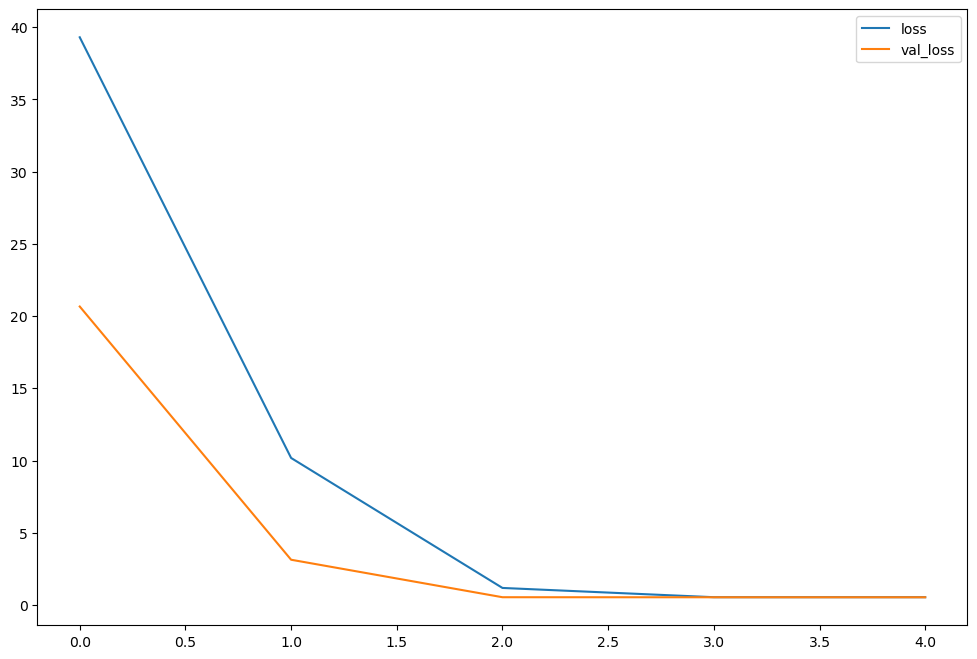

In [364]:
loss_df = pd.DataFrame(history.history)
loss_df.plot(figsize=(12,8))

In [365]:
x.sample(2)

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
199370,0.819422,2.78184,14.575157,0.889993,0.285194,0.857274,2.150922,0.827684,0.852009,0.845716,1.670026,0.835212,0.927817,0.736528
147157,0.304499,1.72611,11.554430,0.396212,0.979672,0.336522,1.844207,0.682023,0.351994,0.414075,0.525467,0.280872,0.371829,0.265174


In [366]:
data.sample(2)

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
81156,203403,0.485879,0.555702,0.489573,0.531804,0.280309,0.436065,0.401953,0.353069,0.341093,0.442313,0.355427,0.307314,0.603623,0.821762
72590,181951,0.564502,0.203252,0.497014,0.297397,0.376792,0.331591,0.357879,0.301106,0.347244,0.380905,0.214418,0.283660,0.304293,0.366774


In [367]:
tahmin = model.predict(data.drop("id", axis=1))

6250/6250 [==============================] - 8s 1ms/step


In [368]:
len(tahmin), len(data)

(200000, 200000)

In [369]:
data["target"] = tahmin
data.head()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,0,0.353600,0.738780,0.600939,0.293377,0.285691,0.458006,0.620704,0.422249,0.369203,0.435727,0.550540,0.699134,0.286864,0.364515,7.886174
1,2,0.907222,0.189756,0.215531,0.869915,0.301333,0.528958,0.390351,0.521112,0.794779,0.798580,0.446475,0.449037,0.916964,0.513002,7.886174
2,6,0.179287,0.355353,0.623972,0.437812,0.282476,0.320826,0.386789,0.776422,0.222268,0.229102,0.211913,0.222651,0.327164,0.827941,7.886174
3,7,0.359385,0.181049,0.551368,0.206386,0.280763,0.482076,0.506677,0.362793,0.379737,0.345686,0.445276,0.518485,0.299028,0.598166,7.886174
4,10,0.335791,0.682607,0.676481,0.219465,0.282861,0.581721,0.748639,0.350158,0.448915,0.506878,0.817721,0.805895,0.790591,0.249275,7.886174


In [370]:
my_pred = data[["id","target"]]
my_pred.head()

,id,target
0,0,7.886174
1,2,7.886174
2,6,7.886174
3,7,7.886174
4,10,7.886174


In [371]:
my_pred.to_csv("pred2.csv", index = False)

# Korelasyonu 0 ve üzeri olan sütunları alıp tekrar test edelim bakalım sonuçta bir düzelme olacak mı?

In [372]:
azizo

['cont7',
 'cont2',
 'cont3',
 'cont11',
 'cont12',
 'cont6',
 'cont8',
 'cont4',
 'id',
 'target']

In [373]:
df = df[azizo]
data = data[azizo]

In [374]:
df.head()

,cont7,cont2,cont3,cont11,cont12,cont6,cont8,cont4,id,target
0,3.404000,3.466263,22.267663,1.788604,0.866772,0.855953,0.285542,0.291791,1,7.243043
1,2.263856,2.121953,14.462880,0.874843,0.434971,0.449805,0.580748,0.501149,3,8.203331
2,1.467160,1.588886,9.936972,1.244715,0.677708,0.829175,0.558771,0.293408,4,7.776091
3,1.825827,1.859498,12.494148,1.587737,0.818143,0.785108,0.823267,0.726104,5,6.957716
4,1.816697,2.809620,12.867329,1.884039,0.900464,0.830131,0.604157,0.880214,8,7.951046


In [375]:
data.head()

,cont7,cont2,cont3,cont11,cont12,cont6,cont8,cont4,id,target
0,0.620704,0.738780,0.600939,0.550540,0.699134,0.458006,0.422249,0.293377,0,7.886174
1,0.390351,0.189756,0.215531,0.446475,0.449037,0.528958,0.521112,0.869915,2,7.886174
2,0.386789,0.355353,0.623972,0.211913,0.222651,0.320826,0.776422,0.437812,6,7.886174
3,0.506677,0.181049,0.551368,0.445276,0.518485,0.482076,0.362793,0.206386,7,7.886174
4,0.748639,0.682607,0.676481,0.817721,0.805895,0.581721,0.350158,0.219465,10,7.886174


In [376]:
x = df.drop(["id","target"], axis=1)
y = df[["target"]]

In [377]:
x.head(3)

,cont7,cont2,cont3,cont11,cont12,cont6,cont8,cont4
0,3.404000,3.466263,22.267663,1.788604,0.866772,0.855953,0.285542,0.291791
1,2.263856,2.121953,14.462880,0.874843,0.434971,0.449805,0.580748,0.501149
2,1.467160,1.588886,9.936972,1.244715,0.677708,0.829175,0.558771,0.293408


In [378]:
y.head(3)

,target
0,7.243043
1,8.203331
2,7.776091


In [379]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state=42)

In [380]:
model=Sequential()
model.add(Dense(16,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1)) # regresyonda burayı 1 seçiyoruz activation yazmıyoruz
model.compile(loss="mse",optimizer='adam')

In [381]:
epochs = 100
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=epochs, batch_size=64, verbose=1)

Epoch 1/100
3750/3750 [==============================] - 32s 8ms/step - loss: 0.7684 - val_loss: 0.5472
Epoch 2/100
3750/3750 [==============================] - 35s 9ms/step - loss: 0.5580 - val_loss: 0.6139
Epoch 3/100
3750/3750 [==============================] - 31s 8ms/step - loss: 0.5486 - val_loss: 0.5334
Epoch 4/100
3750/3750 [==============================] - 31s 8ms/step - loss: 0.5430 - val_loss: 0.5421
Epoch 5/100
3750/3750 [==============================] - 32s 9ms/step - loss: 0.5416 - val_loss: 0.5259
Epoch 6/100
3750/3750 [==============================] - 31s 8ms/step - loss: 0.5402 - val_loss: 0.5293
Epoch 7/100
3750/3750 [==============================] - 32s 8ms/step - loss: 0.5405 - val_loss: 0.5408
Epoch 8/100
3750/3750 [==============================] - 30s 8ms/step - loss: 0.5394 - val_loss: 0.5853
Epoch 9/100
3750/3750 [==============================] - 31s 8ms/step - loss: 0.5377 - val_loss: 0.5383
Epoch 10/100
3750/3750 [==============================] - 32s 8m

In [382]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 16)                144       
                                                                 
 dense_62 (Dense)            (None, 64)                1088      
                                                                 
 dense_63 (Dense)            (None, 128)               8320      
                                                                 
 dense_64 (Dense)            (None, 1024)              132096    
                                                                 
 dense_65 (Dense)            (None, 256)               262400    
                                                                 
 dense_66 (Dense)            (None, 64)                16448     
                                                                 
 dense_67 (Dense)            (None, 16)               

In [383]:
model.evaluate(x_test,y_test)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.5215


0.5214605331420898

In [384]:
tahmin = model.predict(x_test)

1875/1875 [==============================] - 6s 3ms/step


In [385]:
r2_score(tahmin,y_test)

-32.31585349389622

In [386]:
(mean_squared_error(y_test,tahmin))**.5

0.7221222440054775

<AxesSubplot:>

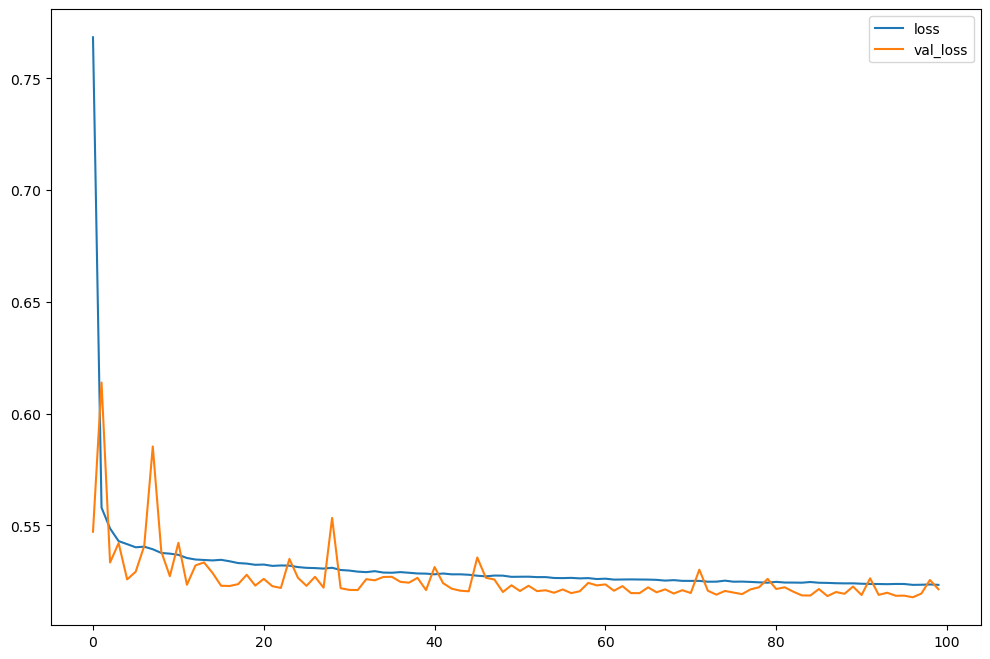

In [387]:
loss_df = pd.DataFrame(history.history)
loss_df.plot(figsize=(12,8))

In [388]:
tahmin = model.predict(data.drop(["id","target"], axis=1))

6250/6250 [==============================] - 21s 3ms/step


In [389]:
data["target"] = tahmin
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,cont7,cont2,cont3,cont11,cont12,cont6,cont8,cont4,id,target
0,0.620704,0.738780,0.600939,0.550540,0.699134,0.458006,0.422249,0.293377,0,7.461858
1,0.390351,0.189756,0.215531,0.446475,0.449037,0.528958,0.521112,0.869915,2,7.427536
2,0.386789,0.355353,0.623972,0.211913,0.222651,0.320826,0.776422,0.437812,6,7.465376
3,0.506677,0.181049,0.551368,0.445276,0.518485,0.482076,0.362793,0.206386,7,7.630038
4,0.748639,0.682607,0.676481,0.817721,0.805895,0.581721,0.350158,0.219465,10,7.566848


In [390]:
my_pred = data[["id","target"]]
my_pred.head()

,id,target
0,0,7.461858
1,2,7.427536
2,6,7.465376
3,7,7.630038
4,10,7.566848


In [391]:
my_pred.to_csv("pred3.csv", index = False)